# Feature Engineering:
Feature engineering is the process of using practical, statistical, and data science knowledge to select, transform, or extract characteristics, properties, and attributes from raw data.

In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np
import math
# Packages for visualizationa
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

In [2]:
df=pd.read_csv(r"C:\Users\yorgh\Documents\Course Materials\Google Advanced Data Analytics Course\Datasets Exercise\Automatidata project\2017_Yellow_Taxi_Trip_CleanData.csv")
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,13.8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,16.8
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,7.3
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,21.3
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21917,67858616,2,2017-08-10 22:20:04,2017-08-10 22:29:31,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.0,0.3,8.8
21918,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.0,0.3,5.8
21919,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.0,0.3,5.3
21920,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.0,0.3,11.3


In [3]:
# Checking for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###

# Check for duplicates
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

# Check for missing values in dataframe
print('Total count of missing values:', df.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df.isna().sum()

Shape of dataframe: (21922, 18)
Shape of dataframe with duplicates dropped: (21922, 18)
Total count of missing values: 0
Missing values per column:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [4]:
# Display descriptive stats about the data
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.192200e+04,21922.000000,21922.000000,21922.000000,21922.0,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000
mean,5.675393e+07,1.558526,1.643372,2.555592,1.0,162.734376,161.787246,1.323830,11.823511,0.322097,0.499863,1.680368,0.186587,0.299945,12.950794
std,3.274305e+07,0.496574,1.288570,2.763908,0.0,66.879626,70.042889,0.467947,8.327256,0.371611,0.008271,2.003999,1.024419,0.004052,8.343011
min,1.212700e+04,1.000000,0.000000,0.000000,1.0,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.854718e+07,1.000000,1.000000,0.980000,1.0,113.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,7.800000
50%,5.676933e+07,2.000000,1.000000,1.600000,1.0,162.000000,162.000000,1.000000,9.000000,0.000000,0.500000,1.350000,0.000000,0.300000,10.300000
75%,8.534490e+07,2.000000,2.000000,2.900000,1.0,233.000000,233.000000,2.000000,14.000000,0.500000,0.500000,2.350000,0.000000,0.300000,15.300000
max,1.134863e+08,2.000000,6.000000,30.830000,1.0,265.000000,265.000000,2.000000,90.500000,1.000000,0.500000,28.000000,17.280000,0.300000,91.300000


##### data is clean and ready for modifications

In [5]:
# Display data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21922 entries, 0 to 21921
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             21922 non-null  int64  
 1   VendorID               21922 non-null  int64  
 2   tpep_pickup_datetime   21922 non-null  object 
 3   tpep_dropoff_datetime  21922 non-null  object 
 4   passenger_count        21922 non-null  int64  
 5   trip_distance          21922 non-null  float64
 6   RatecodeID             21922 non-null  int64  
 7   store_and_fwd_flag     21922 non-null  object 
 8   PULocationID           21922 non-null  int64  
 9   DOLocationID           21922 non-null  int64  
 10  payment_type           21922 non-null  int64  
 11  fare_amount            21922 non-null  float64
 12  extra                  21922 non-null  float64
 13  mta_tax                21922 non-null  float64
 14  tip_amount             21922 non-null  float64
 15  to

In [6]:
# Converting datetime columns to datetime
# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

# Convert `tpep_pickup_datetime` to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

# Convert `tpep_dropoff_datetime` to datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)

df.head(3)

Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,13.8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,16.8
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,7.3


#### Create `duration` column
Check duration of trips for any outliers

In [7]:
# Creating `duration` column needed later for rush hour calculations
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

#### Check for outliers

##### In the cleaning process we already included the necessary charges and eliminated the tip amount and toll amount. We do not need the 'fare_amount' column since we already included all necessary charges in the 'total_amount' column.

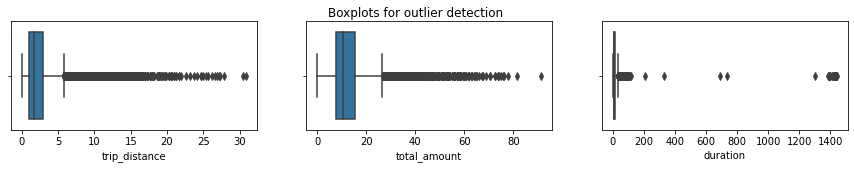

In [8]:
# Checking for outliers (needed mostly for the MLR model)
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.boxplot(ax=axes[1], x=df['total_amount'])
sns.boxplot(ax=axes[2], x=df['duration'])
plt.show();

##### trip_distance ranges from 0 -> 33 miles, total_amount 0 -> 91$, and duration from 0 -> 1500 mins.
 1500 mins is more than a day, we will need to evaluate these excessive numbers

In [9]:
# trip distance ranges from 0 -> 33 miles, total_amount 0 -> 91 $ , and duration from 0 -> 1500 mins.
# duration values are very big and need to be checked.
duration_outliers = df[df['duration'] > 120].reset_index(drop=True)
# duration_outliers.describe()
duration_outliers['hrs']=duration_outliers.duration/60
duration_outliers.sort_values(by=['duration'],ascending=False)[['trip_distance','total_amount','duration','hrs']].reset_index(drop=True)

,trip_distance,total_amount,duration,hrs
0,4.86,18.8,1439.550000,23.992500
1,0.74,8.8,1439.150000,23.985833
2,0.95,8.8,1438.850000,23.980833
3,1.73,10.3,1438.650000,23.977500
4,1.99,8.3,1438.550000,23.975833
5,1.09,8.3,1438.466667,23.974444
6,3.13,31.3,1438.266667,23.971111
7,2.93,19.3,1438.033333,23.967222
8,4.70,24.3,1436.966667,23.949444
9,1.93,16.3,1436.500000,23.941667


##### Values of duration column do not make sense and these results need to be communicated with the Taxi company.
##### In our case, since this is an imaginary scenario we will need to work with those values either by erasing them, re-assigning them to the interquantile range maximum limits, or try to normalize by using log,sqrt,...

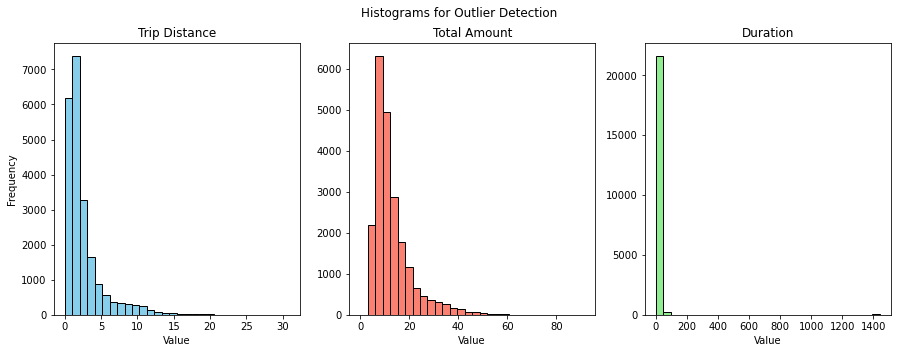

In [10]:
# Creating a figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Setting the overall title for the figure
fig.suptitle('Histograms for Outlier Detection')

# Creating histograms for trip distance, fare amount, and duration
axes[0].hist(df['trip_distance'], bins=30, color='skyblue', edgecolor='black')
axes[1].hist(df['total_amount'], bins=30, color='salmon', edgecolor='black')
axes[2].hist(df['duration'], bins=30, color='lightgreen', edgecolor='black')

# Setting titles for individual subplots
axes[0].set_title('Trip Distance')
axes[1].set_title('Total Amount')
axes[2].set_title('Duration')

# Setting labels for x-axis
for ax in axes:
    ax.set_xlabel('Value')

# Setting labels for y-axis
axes[0].set_ylabel('Frequency')

# Show the plot
plt.show()

#### Create `mean_distance` & `mean_duration` columns

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, we will create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

We will also create a column called `mean_duration` that captures the average duration time based on the give pickup and dropoff points. 

In [11]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

In [12]:
# Create the mean distance for every unique `pickup_dropoff` column
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
100 100,0.370
100 107,1.180
100 113,2.024
100 114,1.940
100 12,4.550


In [13]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [14]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4735,3.521667
16042,3.521667
17497,3.521667
19076,3.521667
19876,3.521667


In [15]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4735,22.847222
16042,22.847222
17497,22.847222
19076,22.847222
19876,22.847222


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [16]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [17]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [18]:
def rush_hours(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [19]:
# Apply the `rush_hours()` function to the new column
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hours, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,13.8,14.066667,100 231,3.521667,22.847222,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,16.8,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,7.3,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,21.3,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.8,16.716667,4 112,4.435000,14.616667,saturday,apr,0


#### Delete unnecessary columns

In [20]:
# Eliminating unneccesary columns
df.describe()
df['payment_type'].sort_values().value_counts(normalize=True)
df.groupby(['payment_type']).mean()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,mean_distance,mean_duration,rush_hour
payment_type,,,,,,,,,,,,,,,,,,
1,5.663114e+07,1.555151,1.621399,2.660824,1.0,163.029819,162.305741,12.129866,0.329926,0.499899,2.485126,0.222615,0.299939,13.267584,15.371499,2.652705,16.334171,0.312150
2,5.701032e+07,1.565573,1.689252,2.335863,1.0,162.117481,160.704606,11.183829,0.305747,0.499789,0.000000,0.111359,0.299958,12.289322,17.842699,2.352815,15.832601,0.266094


##### 'payment_type' column has two unique values evenly distributed and can be neglected without causing a major disturbance to our ML model.
##### The tip amount is only included in credit card payments, in our case this is not important since we are trying to predict the fare amount, not the tip amount.

In [21]:
# Eliminating unneccesary columns
df['store_and_fwd_flag'].sort_values().value_counts(normalize=True)
df.groupby(['store_and_fwd_flag']).describe()
df.groupby(['store_and_fwd_flag']).mean()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,mean_distance,mean_duration,rush_hour
store_and_fwd_flag,,,,,,,,,,,,,,,,,,,
N,5.678244e+07,1.560931,1.645135,2.553531,1.0,162.737585,161.849872,1.323484,11.815718,0.322132,0.499863,1.67995,0.186091,0.299945,12.943059,16.173516,2.553175,16.173397,0.297187
Y,5.013372e+07,1.000000,1.234043,3.034043,1.0,161.989362,147.244681,1.404255,13.632979,0.313830,0.500000,1.77734,0.301702,0.300000,14.746809,15.761170,3.116772,15.788656,0.308511


##### 'store_and_fwd_flag' column also does not have major difference between both groups.

##### same concept for 'VendorID' & 'passenger_count'

In [22]:
# Eliminating unneccesary columns
df.groupby('VendorID').describe()[['mean_duration','total_amount']]
# df.groupby('VendorID').mean(numeric_only=False)
# df['VendorID'].value_counts(normalize=True)

mean_duration                                                       \
                 count       mean        std       min       25%        50%   
VendorID                                                                      
1               9678.0  16.110868  22.475605  0.000000  8.095370  11.602874   
2              12244.0  16.219869  23.701332  0.016667  8.050439  11.556667   

                             total_amount                                 \
             75%         max        count       mean       std  min  25%   
VendorID                                                                   
1         18.130  735.558333       9678.0  13.005776  8.353705  3.3  7.8   
2         17.825  735.558333      12244.0  12.907334  8.334634  0.0  7.8   

                            
           50%   75%   max  
VendorID                    
1         10.3  15.3  91.3  
2         10.3  15.3  81.3

In [23]:
df.groupby('passenger_count').mean(numeric_only=True)
df['passenger_count'].value_counts(normalize=True)

1    0.710975
2    0.144102
5    0.050953
3    0.041921
6    0.030654
4    0.019934
0    0.001460
Name: passenger_count, dtype: float64

In [24]:
df2=df.copy()

In [25]:
df2 = df2.drop(['Unnamed: 0', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'fare_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'pickup_dropoff', 'day', 'month','passenger_count','VendorID'
               ], axis=1)
df2

,trip_distance,total_amount,duration,mean_distance,mean_duration,rush_hour
0,3.34,13.8,14.066667,3.521667,22.847222,0
1,1.80,16.8,26.500000,3.108889,24.470370,0
2,1.00,7.3,7.200000,0.881429,7.250000,1
3,3.70,21.3,30.250000,3.700000,30.250000,0
4,4.37,17.8,16.716667,4.435000,14.616667,0
...,...,...,...,...,...,...
21917,0.89,8.8,9.450000,1.062778,8.095370,0
21918,0.61,5.8,3.266667,1.098214,8.594643,1
21919,0.42,5.3,4.133333,0.684242,6.609091,0
21920,2.36,11.3,11.933333,2.077500,16.650000,0


### Draw scatterplot to visualize the relationship between mean_duration and total_amount

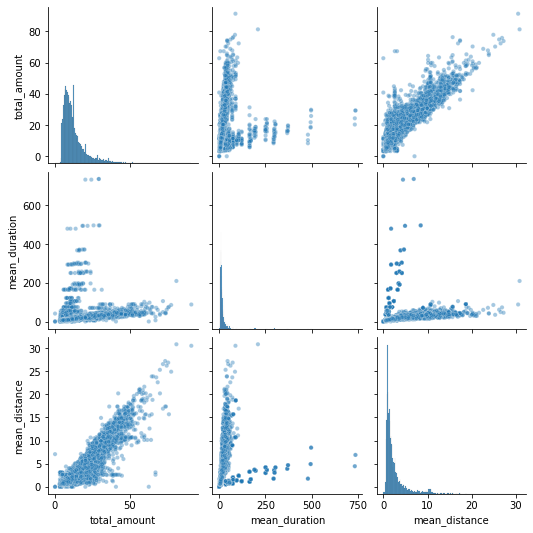

In [26]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###

sns.pairplot(df2[['total_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

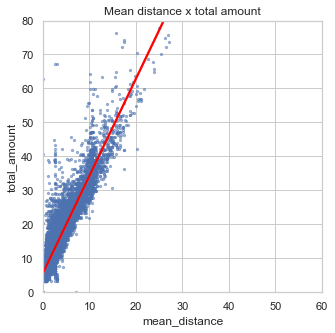

In [27]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df2['mean_distance'], y=df2['total_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 80)
plt.xlim(0, 60)
plt.title('Mean distance x total amount')
plt.show()

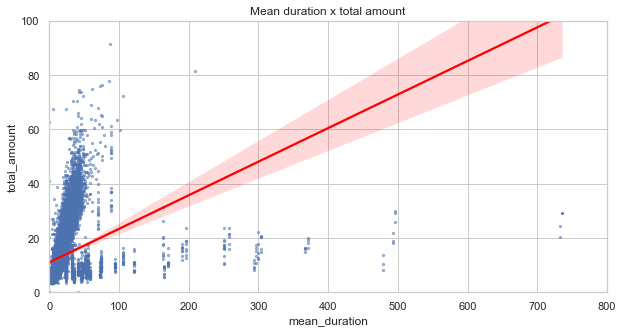

In [28]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.regplot(x=df2['mean_duration'], y=df2['total_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 100)
plt.xlim(0, 800)
plt.title('Mean duration x total amount')
plt.show()

In [29]:
df[df['mean_duration'] > 20][['mean_duration','PULocationID','DOLocationID']].value_counts().head(20)

mean_duration  PULocationID  DOLocationID
24.452171      264           264             261
33.450995      186           230              67
36.000000      161           161              46
41.671481      48            161              45
42.204651      138           230              43
45.125439      161           163              38
50.862162      161           186              37
45.199074      138           161              36
47.595714      140           236              35
55.321717      162           230              33
55.934946      170           186              31
54.793011      162           161              31
47.770968      107           79               31
53.297849      43            236              31
33.536667      138           162              30
58.993590      143           239              26
34.972667      161           138              25
74.337879      239           166              22
72.818939      161           162              22
75.104545      230         

### Fixing some problems in the mean_duration:

#### Problem 1:
We noticed on plotting the total_amount vs mean_duration some values were represented by a straight vertical lines.

This is due to having some trips with the pickup and dropoff locations being the same (ex:264).The so called "round_trips".

Those trips will give the same mean_duration and mean_distance but different fare amounts, since we attached the mean values to a pickup/dropoff key.

The solution for such issue is to exclude the round_trips from being attached to the pickup/dropoff key, and to be individually represented with their unique mean_distance and mean_duration 

#### Problem 2:
Too many outliers we need to normalize the mean duration or impute the outliers.

In [30]:
# check=df[(df['mean_duration']>24.44)&(df['mean_duration']<24.5)]
# check['mean_duration'].value_counts().head(20)
# check
df[df['mean_duration'] > 20][['mean_duration','PULocationID','DOLocationID']].value_counts().head(20)

mean_duration  PULocationID  DOLocationID
24.452171      264           264             261
33.450995      186           230              67
36.000000      161           161              46
41.671481      48            161              45
42.204651      138           230              43
45.125439      161           163              38
50.862162      161           186              37
45.199074      138           161              36
47.595714      140           236              35
55.321717      162           230              33
55.934946      170           186              31
54.793011      162           161              31
47.770968      107           79               31
53.297849      43            236              31
33.536667      138           162              30
58.993590      143           239              26
34.972667      161           138              25
74.337879      239           166              22
72.818939      161           162              22
75.104545      230         

In [31]:
### Solution problem 1
# Set mean_distance and mean_duration values based on condition
mask = df['PULocationID'] == df['DOLocationID']
df.loc[mask, 'mean_distance'] = df.loc[mask, 'trip_distance']
df.loc[mask, 'mean_duration'] = df.loc[mask, 'duration']

In [32]:
### check again
# check=df[(df['mean_duration']>24.44)&(df['mean_duration']<24.5)]
# check['mean_duration'].value_counts().head(20)
# # check
df[df['mean_duration'] > 20]['mean_duration'].value_counts().head(20)

33.450995    67
41.671481    45
42.204651    43
45.125439    38
50.862162    37
45.199074    36
47.595714    35
55.321717    33
53.297849    31
47.770968    31
55.934946    31
54.793011    31
33.536667    30
58.993590    26
34.972667    25
75.104545    22
72.818939    22
74.337879    22
39.750794    21
38.297368    19
Name: mean_duration, dtype: int64

In [33]:
df2=df.copy()

In [34]:
df2 = df2.drop(['Unnamed: 0', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'fare_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'pickup_dropoff', 'day', 'month','passenger_count','VendorID'
               ], axis=1)

In [35]:
###### Solution Problem 2 outliers
# Compute the square root
# square_root = math.sqrt(number)
df2['sqr_mean_duration'] = np.sqrt(df2['mean_duration'])
df2['sqr_total_amount'] = np.sqrt(df2['total_amount'])
df2['sqr_mean_distance'] = np.sqrt(df2['mean_distance'])

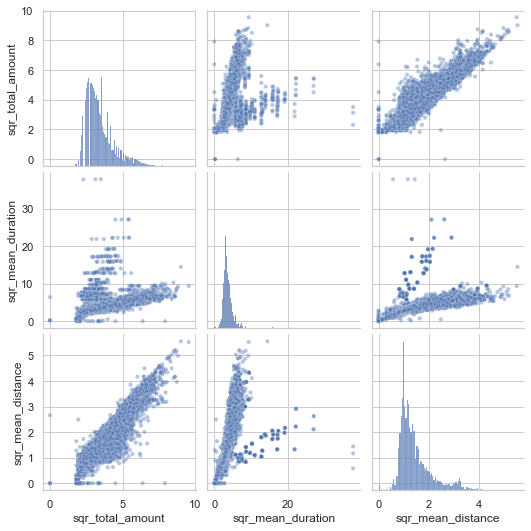

In [36]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###

sns.pairplot(df2[['sqr_total_amount', 'sqr_mean_duration', 'sqr_mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

In [37]:
###### Solution Problem 2 outliers
# Compute the square root
# square_root = math.sqrt(number)
df2['log_mean_duration'] = np.log(df2['mean_duration'])
df2['log_total_amount'] = np.log(df2['total_amount'])
df2['log_mean_distance'] = np.log(df2['mean_distance'])
df2.describe()

C:\Users\yorgh\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yorgh\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yorgh\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,trip_distance,total_amount,duration,mean_distance,mean_duration,rush_hour,sqr_mean_duration,sqr_total_amount,sqr_mean_distance,log_mean_duration,log_total_amount,log_mean_distance
count,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,2.192200e+04,2.192200e+04,2.192200e+04
mean,2.555592,12.950794,16.171748,2.555592,16.171748,0.297236,3.694565,3.458866,1.453998,-inf,-inf,-inf
std,2.763908,8.343011,60.620599,2.716240,28.482654,0.457052,1.588098,0.993523,0.664456,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf,-inf,-inf
25%,0.980000,7.800000,6.633333,1.008218,8.052083,0.000000,2.837619,2.792848,1.004101,2.085931e+00,2.054124e+00,8.184239e-03
50%,1.600000,10.300000,11.000000,1.567727,11.492857,0.000000,3.390112,3.209361,1.252089,2.441726e+00,2.332144e+00,4.496270e-01
75%,2.900000,15.300000,17.716667,2.856667,17.608333,1.000000,4.196228,3.911521,1.690168,2.868372e+00,2.727853e+00,1.049655e+00
max,30.830000,91.300000,1439.550000,30.830000,1431.266667,1.000000,37.832085,9.555103,5.552477,7.266315e+00,4.514151e+00,3.428488e+00


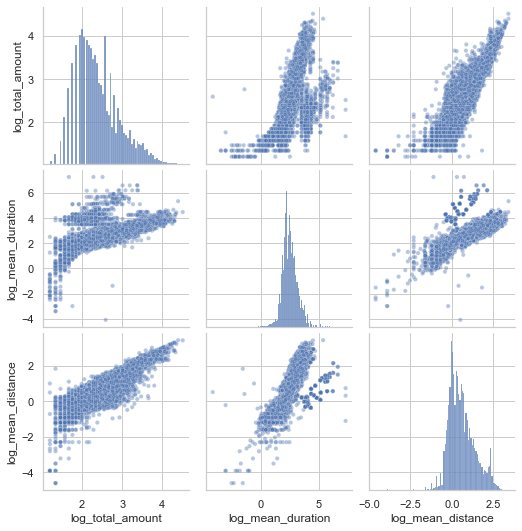

In [38]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###

sns.pairplot(df2[['log_total_amount', 'log_mean_duration', 'log_mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

C:\Users\yorgh\anaconda3\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\yorgh\anaconda3\lib\site-packages\numpy\core\function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
C:\Users\yorgh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


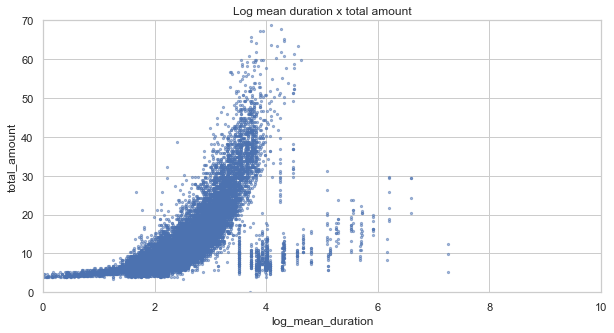

In [39]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.regplot(x=df2['log_mean_duration'], y=df2['total_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0,10)
plt.title('Log mean duration x total amount')
plt.show()

In [40]:
#### Problem 2 Outliers:

def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df2.loc[df2[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df2[col].quantile(0.25)
        q3 = df2[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df2.loc[df2[col] > upper_threshold, col] = upper_threshold
        print(df2[col].describe())
        print()
outlier_imputer(['mean_duration'], 1.5)

mean_duration
q3: 17.608333333333334
upper_threshold: 31.942708333333336
count    21922.000000
mean        13.781611
std          7.985921
min          0.000000
25%          8.052083
50%         11.492857
75%         17.608333
max         31.942708
Name: mean_duration, dtype: float64



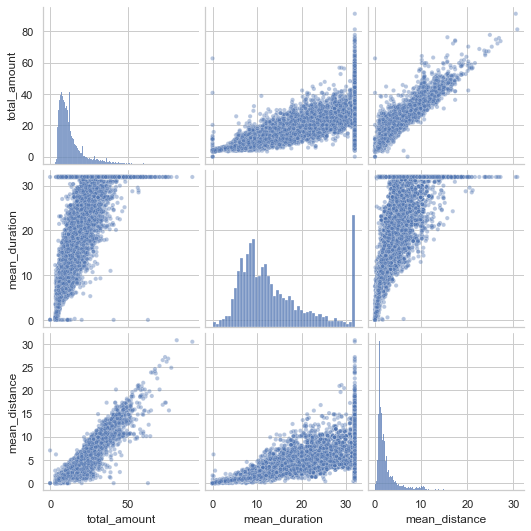

In [41]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###

sns.pairplot(df2[['total_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

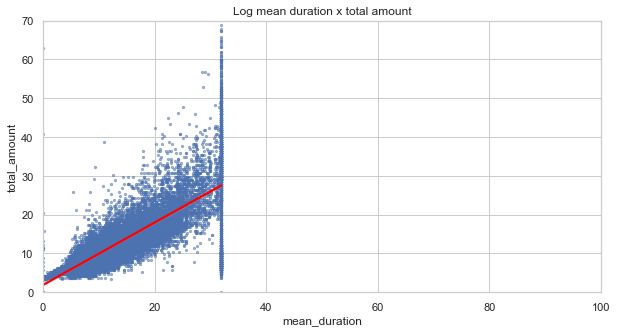

In [42]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.regplot(x=df2['mean_duration'], y=df2['total_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0,100)
plt.title('Log mean duration x total amount')
plt.show()

In [43]:
df3=df2.copy()
df3=df3[['mean_distance','mean_duration','total_amount','rush_hour']]

In [44]:
# df3.to_csv(r"C:\Users\yorgh\Documents\Course Materials\Google Advanced Data Analytics Course\Datasets Exercise\Automatidata project\2017_Yellow_Taxi_Trip_Features_engineering.csv", index=False)

### End

In [45]:
###### Solution Problem 2 outliers
# Compute the square root
# square_root = math.sqrt(number)
df2['log2_mean_duration'] = np.log(df2['mean_duration'])
# df2['log_total_amount'] = np.log(df2['total_amount'])
# df2['log_mean_distance'] = np.log(df2['mean_distance'])
df2.describe()

C:\Users\yorgh\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,trip_distance,total_amount,duration,mean_distance,mean_duration,rush_hour,sqr_mean_duration,sqr_total_amount,sqr_mean_distance,log_mean_duration,log_total_amount,log_mean_distance,log2_mean_duration
count,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,2.192200e+04,2.192200e+04,2.192200e+04,2.192200e+04
mean,2.555592,12.950794,16.171748,2.555592,13.781611,0.297236,3.694565,3.458866,1.453998,-inf,-inf,-inf,-inf
std,2.763908,8.343011,60.620599,2.716240,7.985921,0.457052,1.588098,0.993523,0.664456,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf,-inf,-inf,-inf
25%,0.980000,7.800000,6.633333,1.008218,8.052083,0.000000,2.837619,2.792848,1.004101,2.085931e+00,2.054124e+00,8.184239e-03,2.085931e+00
50%,1.600000,10.300000,11.000000,1.567727,11.492857,0.000000,3.390112,3.209361,1.252089,2.441726e+00,2.332144e+00,4.496270e-01,2.441726e+00
75%,2.900000,15.300000,17.716667,2.856667,17.608333,1.000000,4.196228,3.911521,1.690168,2.868372e+00,2.727853e+00,1.049655e+00,2.868372e+00
max,30.830000,91.300000,1439.550000,30.830000,31.942708,1.000000,37.832085,9.555103,5.552477,7.266315e+00,4.514151e+00,3.428488e+00,3.463944e+00


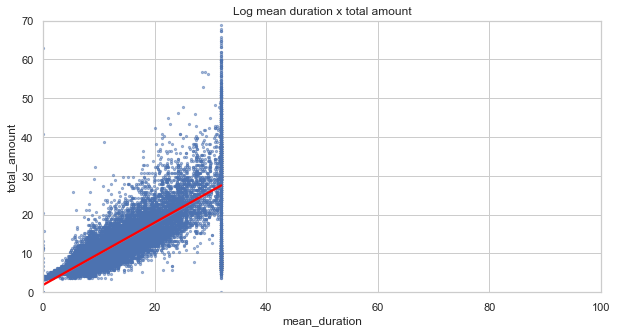

In [46]:
# df2['sqr2_mean_duration'] = np.sqrt(df2['mean_duration'])
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.regplot(x=df2['mean_duration'], y=df2['total_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0,100)
plt.title('Log mean duration x total amount')
plt.show()

In [47]:
# df3[df3['mean_duration'] > 20]['mean_duration'].value_counts().head(20)
# check=df[(df['mean_duration']>33.44)&(df['mean_duration']<33.5)].head(20)
# check['mean_duration'].value_counts().head(20)
# check
df[df['mean_duration'] > 33][['mean_duration','PULocationID','DOLocationID']].value_counts().head(20)

mean_duration  PULocationID  DOLocationID
33.450995      186           230             67
41.671481      48            161             45
42.204651      138           230             43
45.125439      161           163             38
50.862162      161           186             37
45.199074      138           161             36
47.595714      140           236             35
55.321717      162           230             33
55.934946      170           186             31
54.793011      162           161             31
53.297849      43            236             31
47.770968      107           79              31
33.536667      138           162             30
58.993590      143           239             26
34.972667      161           138             25
72.818939      161           162             22
74.337879      239           166             22
75.104545      230           237             22
39.750794      138           163             21
38.297368      138           164             1

In [48]:
# Create correlation matrix containing pairwise correlation of columns, using pearson correlation coefficient
df2.corr(method='pearson')

,trip_distance,total_amount,duration,mean_distance,mean_duration,rush_hour,sqr_mean_duration,sqr_total_amount,sqr_mean_distance,log_mean_duration,log_total_amount,log_mean_distance,log2_mean_duration
trip_distance,1.000000,0.949821,0.130240,0.982753,0.716986,-0.055960,0.530998,0.916332,0.952831,0.599343,0.857671,0.862616,0.617781
total_amount,0.949821,1.000000,0.163681,0.931305,0.768602,-0.008330,0.574498,0.983540,0.921263,0.659855,0.938730,0.855565,0.681341
duration,0.130240,0.163681,1.000000,0.126102,0.221404,-0.007373,0.397036,0.167271,0.132710,0.268838,0.165930,0.129539,0.182584
mean_distance,0.982753,0.931305,0.126102,1.000000,0.729569,-0.056029,0.540317,0.895154,0.969552,0.609870,0.833681,0.877794,0.628631
mean_duration,0.716986,0.768602,0.221404,0.729569,1.000000,-0.030214,0.837611,0.793559,0.787216,0.915021,0.791029,0.788208,0.905359
rush_hour,-0.055960,-0.008330,-0.007373,-0.056029,-0.030214,1.000000,-0.023101,-0.003150,-0.061732,-0.021839,0.003296,-0.058383,-0.023380
sqr_mean_duration,0.530998,0.574498,0.397036,0.540317,0.837611,-0.023101,1.000000,0.594369,0.588582,0.894401,0.596497,0.595334,0.764348
sqr_total_amount,0.916332,0.983540,0.167271,0.895154,0.793559,-0.003150,0.594369,1.000000,0.921369,0.706437,0.984754,0.889182,0.740788
sqr_mean_distance,0.952831,0.921263,0.132710,0.969552,0.787216,-0.061732,0.588582,0.921369,1.000000,0.699246,0.892169,0.962330,0.735712
log_mean_duration,0.599343,0.659855,0.268838,0.609870,0.915021,-0.021839,0.894401,0.706437,0.699246,1.000000,0.733676,0.760414,0.967165
